# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 05

Group Members:
- Adinda Khairunnisa Indraputri (18222104)
- Chairul Nur Wahid (18222132)

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
import random
import string

# Import other libraries if needed

## Import Dataset

In [6]:
# Reading CSV files from a gdrive link {Google Collab}
train_df = pd.read_csv('https://drive.google.com/uc?id=1e1DOnQc-8_12ytIxqM8HjQNS9-q99IWJ')

# Display the first few rows of the DataFrame
train_df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [7]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(train_df.head())

# Check if the dataset has a target column
if 'label' not in train_df.columns:
    raise ValueError("Dataset does not contain a 'label' column. Please ensure the target variable is correctly named.")

# Split the dataset into features (X) and target (y)
X = train_df.drop(columns=['label'])  # Replace 'label' with the actual name of your target column if different
y = train_df['label']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# Save the splits to CSV files for further use if needed
# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# X_val.to_csv('X_val.csv', index=False)
# y_val.to_csv('y_val.csv', index=False)

First few rows of the dataset:
   id     FILENAME                                   URL  URLLength  \
0   1          NaN             https://www.northcm.ac.th       24.0   
1   4  8135291.txt                   http://uqr.to/1il1z        NaN   
2   5   586561.txt  https://www.woolworthsrewards.com.au       35.0   
3   6          NaN                                   NaN       31.0   
4  11   412632.txt                                   NaN        NaN   

                         Domain  DomainLength  IsDomainIP  TLD  \
0             www.northcm.ac.th          17.0         0.0  NaN   
1                           NaN           NaN         NaN   to   
2  www.woolworthsrewards.com.au          28.0         0.0   au   
3                           NaN           NaN         NaN  com   
4        www.nyprowrestling.com          22.0         0.0  NaN   

   CharContinuationRate  TLDLegitimateProb  ...  Pay  Crypto  \
0              0.800000                NaN  ...  0.0     0.0   
1              1.

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [8]:
# Hitung persentase missing values
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Buat DataFrame untuk menyimpan hasil
missing_percentage_df = pd.DataFrame({
    'Feature': train_df.columns,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Tampilkan hasil
print(missing_percentage_df)

def missingvalue(df):
    """
    Handles missing values in the dataset with specific logic for Domain and URL:
    - If URL is available, extract the domain from the URL.
    - If Domain is available, construct the URL using IsHTTPS.
    - Rows with both Domain and URL missing are removed.
    - Fills DomainLength with the length of the Domain.
    - Fills URLLength with the length of the URL.
    - Fills TLD based on the last part of the Domain.
    - Fills TLDLength with the length of the TLD.
    - Fills additional URL-based features based on URL.
    - Generates unique random filenames ending with .txt for missing FILENAME values.
    - Fills TLDLegitimateProb based on consistent TLD-TLDLegitimateProb pairs.

    Parameters:
    - df: pd.DataFrame, the dataset to clean.

    Returns:
    - cleaned_df: pd.DataFrame, the cleaned dataset.
    """
    df_copy = df.copy()

    for idx, row in df_copy.iterrows():
        # If Domain is missing but URL is present
        if pd.isnull(row['Domain']) and not pd.isnull(row['URL']):
            # Extract domain from URL
            domain = row['URL'].split('//')[-1].split('/')[0]
            df_copy.at[idx, 'Domain'] = domain

        # If URL is missing but Domain is present
        elif pd.isnull(row['URL']) and not pd.isnull(row['Domain']):
            # Construct URL based on IsHTTPS
            protocol = 'https://' if pd.isnull(row['IsHTTPS']) or row['IsHTTPS'] == 1 else 'http://'
            url = protocol + row['Domain']
            df_copy.at[idx, 'URL'] = url

    # Fill DomainLength with the length of the Domain
    if 'DomainLength' in df_copy.columns:
        df_copy['DomainLength'] = df_copy['Domain'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

    # Fill URLLength with the length of the URL
    if 'URLLength' in df_copy.columns:
        df_copy['URLLength'] = df_copy['URL'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

    # Fill TLD based on the last part of the Domain
    if 'TLD' in df_copy.columns:
        df_copy['TLD'] = df_copy['Domain'].apply(lambda x: str(x).split('.')[-1] if not pd.isnull(x) and '.' in str(x) else np.nan)

    # Fill TLDLength with the length of the TLD
    if 'TLDLength' in df_copy.columns:
        df_copy['TLDLength'] = df_copy['TLD'].apply(lambda x: len(str(x)) if not pd.isnull(x) else np.nan)

    # Fill additional URL-based features
    if 'CharContinuationRate' in df_copy.columns:
        df_copy['CharContinuationRate'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isalpha()) / len(str(x)) if not pd.isnull(x) and len(str(x)) > 0 else np.nan)

    if 'URLCharProb' in df_copy.columns:
        df_copy['URLCharProb'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isalnum()) / len(str(x)) if not pd.isnull(x) and len(str(x)) > 0 else np.nan)

    if 'NoOfLettersInURL' in df_copy.columns:
        df_copy['NoOfLettersInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isalpha()) if not pd.isnull(x) else np.nan)

    if 'LetterRatioInURL' in df_copy.columns:
        df_copy['LetterRatioInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isalpha()) / len(str(x)) if not pd.isnull(x) and len(str(x)) > 0 else np.nan)

    if 'NoOfDegitsInURL' in df_copy.columns:
        df_copy['NoOfDegitsInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()) if not pd.isnull(x) else np.nan)

    if 'DegitRatioInURL' in df_copy.columns:
        df_copy['DegitRatioInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()) / len(str(x)) if not pd.isnull(x) and len(str(x)) > 0 else np.nan)

    if 'NoOfEqualsInURL' in df_copy.columns:
        df_copy['NoOfEqualsInURL'] = df_copy['URL'].apply(lambda x: str(x).count('=') if not pd.isnull(x) else np.nan)

    if 'NoOfQMarkInURL' in df_copy.columns:
        df_copy['NoOfQMarkInURL'] = df_copy['URL'].apply(lambda x: str(x).count('?') if not pd.isnull(x) else np.nan)

    if 'NoOfAmpersandInURL' in df_copy.columns:
        df_copy['NoOfAmpersandInURL'] = df_copy['URL'].apply(lambda x: str(x).count('&') if not pd.isnull(x) else np.nan)

    if 'NoOfOtherSpecialCharsInURL' in df_copy.columns:
        df_copy['NoOfOtherSpecialCharsInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if not c.isalnum() and c not in ['=', '?', '&']) if not pd.isnull(x) else np.nan)

    if 'SpacialCharRatioInURL' in df_copy.columns:
        df_copy['SpacialCharRatioInURL'] = df_copy['URL'].apply(lambda x: sum(1 for c in str(x) if not c.isalnum()) / len(str(x)) if not pd.isnull(x) and len(str(x)) > 0 else np.nan)

    # Fill missing FILENAME with unique random strings ending in .txt
    if 'FILENAME' in df_copy.columns:
        existing_filenames = set(df_copy['FILENAME'].dropna().unique())
        for idx in df_copy[df_copy['FILENAME'].isnull()].index:
            while True:
                random_filename = ''.join(random.choices(string.ascii_letters + string.digits, k=8)) + '.txt'
                if random_filename not in existing_filenames:
                    df_copy.at[idx, 'FILENAME'] = random_filename
                    existing_filenames.add(random_filename)
                    break

    # Fill TLDLegitimateProb based on consistent TLD-TLDLegitimateProb pairs
    if 'TLD' in df_copy.columns and 'TLDLegitimateProb' in df_copy.columns:
        # Create a mapping of TLD to TLDLegitimateProb for non-missing values
        tld_prob_mapping = df_copy.dropna(subset=['TLD', 'TLDLegitimateProb']).groupby('TLD')['TLDLegitimateProb'].mean().to_dict()
        # Fill missing TLDLegitimateProb using the mapping
        df_copy['TLDLegitimateProb'] = df_copy.apply(
            lambda row: tld_prob_mapping[row['TLD']] if pd.isnull(row['TLDLegitimateProb']) and row['TLD'] in tld_prob_mapping else row['TLDLegitimateProb'],
            axis=1
        )

    # Handle Title-related features
    if 'HasTitle' in df_copy.columns and 'Title' in df_copy.columns and 'DomainTitleMatchScore' in df_copy.columns and 'URLTitleMatchScore' in df_copy.columns:
        for idx, row in df_copy.iterrows():
            # If Title is present, set HasTitle to 1
            if not pd.isnull(row['Title']):
                df_copy.at[idx, 'HasTitle'] = 1
            # If HasTitle is 0, set Title to "untitled" and Match Scores to 0
            elif row['HasTitle'] == 0:
                df_copy.at[idx, 'Title'] = "untitled"
                df_copy.at[idx, 'DomainTitleMatchScore'] = 0
                df_copy.at[idx, 'URLTitleMatchScore'] = 0

        # For missing HasTitle where Match Scores are 0, set HasTitle to 0 and Title to "untitled"
        df_copy.loc[
            (df_copy['HasTitle'].isnull()) & ((df_copy['DomainTitleMatchScore'] == 0) | (df_copy['URLTitleMatchScore'] == 0)),
            ['HasTitle', 'Title']
        ] = [0, "untitled"]

        # Predict missing Titles based on Domain
        for idx, row in df_copy.iterrows():
            if pd.isnull(row['HasTitle']) or row['HasTitle'] != 0:
                if not pd.isnull(row['Domain']) and pd.isnull(row['Title']):
                    domain_parts = row['Domain'].split('.')
                    if len(domain_parts) > 2:
                        predicted_title = domain_parts[1]  # Extract title from domain
                    else:
                        predicted_title = domain_parts[0]
                    df_copy.at[idx, 'Title'] = predicted_title
                    df_copy.at[idx, 'HasTitle'] = 1
                    df_copy.at[idx, 'DomainTitleMatchScore'] = 100
                    df_copy.at[idx, 'URLTitleMatchScore'] = 100

        # Ensure DomainTitleMatchScore and URLTitleMatchScore are synchronized
        df_copy['URLTitleMatchScore'] = df_copy['DomainTitleMatchScore']

    print("Missing values handled. First 5 rows of the cleaned dataset:")
    print(df_copy.head())

    return df_copy

def clean_and_save_dataset(df):
    """
    Cleans the dataset by imputing missing values iteratively and saves the cleaned dataset.
    - Excludes 'id' column from imputation.

    Parameters:
    - df: pd.DataFrame, the dataset to clean.

    Returns:
    - cleaned_df: pd.DataFrame, the cleaned dataset.
    """
    df = missingvalue(df)

    # Impute missing values for numeric columns using median
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_columns) > 0:
        numeric_imputer = SimpleImputer(strategy='median')
        df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Impute missing values for categorical columns using mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    # Save the cleaned dataset
    return df

cleaned_train_df = clean_and_save_dataset(X_train)
print("Cleaned dataset. First 5 rows:")
# Hitung persentase missing values
missing_percentage = (cleaned_train_df.isnull().sum() / len(cleaned_train_df)) * 100

# Buat DataFrame untuk menyimpan hasil
missing_percentage_df = pd.DataFrame({
    'Feature': cleaned_train_df.columns,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

                                               Feature  Missing Percentage
Domain                                          Domain           49.996439
NoOfExternalRef                        NoOfExternalRef           49.413834
LineOfCode                                  LineOfCode           49.252870
HasSocialNet                              HasSocialNet           48.430956
LargestLineLength                    LargestLineLength           48.380388
NoOfURLRedirect                        NoOfURLRedirect           47.992935
HasCopyrightInfo                      HasCopyrightInfo           47.965158
NoOfCSS                                        NoOfCSS           47.814877
NoOfObfuscatedChar                  NoOfObfuscatedChar           47.575568
NoOfSelfRedirect                      NoOfSelfRedirect           47.516453
HasPasswordField                      HasPasswordField           47.388251
LetterRatioInURL                      LetterRatioInURL           46.826301
HasObfuscation           

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [9]:
def handle_outliers(df, method, columns=None, lower_percentile=0.01, upper_percentile=0.99, exclude_columns=None):
    """
    Handles outliers in the dataset.

    Parameters:
    - df: pd.DataFrame, the dataset to handle outliers.
    - method: str, the method to handle outliers ('imputation', 'clipping', 'transformation').
    - columns: list, columns to handle outliers. If None, select numeric columns automatically.
    - exclude_columns: list, columns to exclude from outlier handling (e.g., 'id').
    - lower_percentile: float, the lower percentile for clipping (default=0.01).
    - upper_percentile: float, the upper percentile for clipping (default=0.99).

    Returns:
    - df_copy: pd.DataFrame, the dataset with outliers handled.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Select numeric columns by default, excluding specified columns
    if columns is None:
        columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

    df_copy = df.copy()

    if method == "clipping":
        for col in columns:
            lower_bound = df[col].quantile(lower_percentile)
            upper_bound = df[col].quantile(upper_percentile)
            df_copy[col] = np.clip(df[col], lower_bound, upper_bound)
    elif method == "imputation":
        for col in columns:
            lower_bound = df[col].quantile(lower_percentile)
            upper_bound = df[col].quantile(upper_percentile)
            median_value = df[col].median()
            df_copy[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    elif method == "transformation":
        for col in columns:
            df_copy[col] = np.log1p(df[col] - df[col].min() + 1)  # Apply log transformation
    else:
        raise ValueError("Unsupported method. Choose from 'imputation', 'clipping', or 'transformation'.")

    return df_copy

# Menggunakan fungsi handle_outliers
outlier_handled_df = handle_outliers(
    df=cleaned_train_df,
    method="clipping",
    exclude_columns=['id']
)

print("Outliers handled. First 5 rows:")
print(outlier_handled_df.head())


Outliers handled. First 5 rows:
              id      FILENAME  \
135080  226786.0    407798.txt   
97659   163910.0  rIUj6kfH.txt   
11488    19126.0    820078.txt   
67815   113381.0   8092045.txt   
97148   163038.0    738213.txt   

                                                      URL  URLLength  \
135080                          https://www.tetleyusa.com       25.0   
97659                  https://www.atlanticwhiteshark.org       34.0   
11488                                     https://ipfs.io       27.0   
67815   https://apinchek.protationsacc.eu.org/aprep%d0...       56.0   
97148                           https://www.malankara.com       25.0   

                               Domain  DomainLength  IsDomainIP  TLD  \
135080              www.tetleyusa.com          17.0         0.0  com   
97659      www.atlanticwhiteshark.org          26.0         0.0  org   
11488                         ipfs.io          19.0         0.0  com   
67815   apinchek.protationsacc.eu.org     

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [10]:
def remove_duplicates(df):
    """
    Removes duplicate rows from the dataset.

    Parameters:
    - df: pd.DataFrame, the dataset to remove duplicates from.

    Returns:
    - df: pd.DataFrame, the dataset with duplicates removed.
    """
    initial_shape = df.shape
    df = df.drop_duplicates()
    final_shape = df.shape
    print(f"Duplicates removed: {initial_shape[0] - final_shape[0]}")
    return df

deduplicated_df = remove_duplicates(outlier_handled_df)
print("Dataset after removing duplicates. First 5 rows:")
print(deduplicated_df.head())

Duplicates removed: 0
Dataset after removing duplicates. First 5 rows:
              id      FILENAME  \
135080  226786.0    407798.txt   
97659   163910.0  rIUj6kfH.txt   
11488    19126.0    820078.txt   
67815   113381.0   8092045.txt   
97148   163038.0    738213.txt   

                                                      URL  URLLength  \
135080                          https://www.tetleyusa.com       25.0   
97659                  https://www.atlanticwhiteshark.org       34.0   
11488                                     https://ipfs.io       27.0   
67815   https://apinchek.protationsacc.eu.org/aprep%d0...       56.0   
97148                           https://www.malankara.com       25.0   

                               Domain  DomainLength  IsDomainIP  TLD  \
135080              www.tetleyusa.com          17.0         0.0  com   
97659      www.atlanticwhiteshark.org          26.0         0.0  org   
11488                         ipfs.io          19.0         0.0  com   
678

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

def feature_engineering(df):
    """
    Adds engineered features to the dataset.
    """
    df_copy = df.copy()

    # Interaction Features: Ratio of URLLength to DomainLength
    if 'URLLength' in df_copy.columns and 'DomainLength' in df_copy.columns:
        df_copy['URL_Domain_Ratio'] = df_copy['URLLength'] / df_copy['DomainLength']

    # Polynomial Features: Square and Cube of URLLength
    if 'URLLength' in df_copy.columns:
        df_copy['URLLength_Square'] = df_copy['URLLength'] ** 2
        df_copy['URLLength_Cube'] = df_copy['URLLength'] ** 3

    # Binning: URLLength into categories
    if 'URLLength' in df_copy.columns:
        bins = [0, 20, 40, np.inf]
        labels = ['short', 'medium', 'long']
        df_copy['URLLength_Bin'] = pd.cut(df_copy['URLLength'], bins=bins, labels=labels)

    # Domain-Specific Feature: Does Domain contain secure words
    if 'Domain' in df_copy.columns:
        secure_keywords = ['secure', 'login', 'bank', 'safe']
        df_copy['SecureKeyword'] = df_copy['Domain'].apply(
            lambda x: any(keyword in str(x).lower() for keyword in secure_keywords)
        ).astype(int)

    return df_copy

# Apply feature engineering
engineered_df = feature_engineering(deduplicated_df)

print("Dataset after feature engineering. First 5 rows:")
print(engineered_df.head())


Dataset after feature engineering. First 5 rows:
              id      FILENAME  \
135080  226786.0    407798.txt   
97659   163910.0  rIUj6kfH.txt   
11488    19126.0    820078.txt   
67815   113381.0   8092045.txt   
97148   163038.0    738213.txt   

                                                      URL  URLLength  \
135080                          https://www.tetleyusa.com       25.0   
97659                  https://www.atlanticwhiteshark.org       34.0   
11488                                     https://ipfs.io       27.0   
67815   https://apinchek.protationsacc.eu.org/aprep%d0...       56.0   
97148                           https://www.malankara.com       25.0   

                               Domain  DomainLength  IsDomainIP  TLD  \
135080              www.tetleyusa.com          17.0         0.0  com   
97659      www.atlanticwhiteshark.org          26.0         0.0  org   
11488                         ipfs.io          19.0         0.0  com   
67815   apinchek.protatio

In [12]:
# Cek tipe data dari engineered_df
print(type(engineered_df))


<class 'pandas.core.frame.DataFrame'>


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [33]:
import numpy as np
from collections import Counter
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocessing Function
def preprocess_data(df):
    """
    Preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
    """
    df = df.copy()  # Avoid modifying the original DataFrame

    # Handling missing values
    for column in df.columns:
        if df[column].dtype == 'object' or str(df[column].dtype) == 'category':
            df[column] = df[column].fillna(df[column].mode()[0])  # Fill categorical missing values with mode
        else:
            df[column] = df[column].fillna(df[column].median())  # Fill numeric missing values with median

    # Encoding categorical data
    label_encoders = {}
    for column in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Scaling numerical features
    scaler = StandardScaler()
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

    return df, label_encoders, scaler


### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    A custom transformer for feature scaling:
    """
    def __init__(self, method='standard'):
        """
        Parameters:
        """
        self.method = method
        self.scaler = None

    def fit(self, X, y=None):
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame.")

        if self.method == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.method == 'standard':
            self.scaler = StandardScaler()
        else:
            raise ValueError("Unsupported scaling method. Choose 'minmax' or 'standard'.")

        # Fit scaler only on numeric columns
        self.scaler.fit(X.select_dtypes(include=['float64', 'int64']))
        return self

    def transform(self, X):
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame.")

        # Scale numeric columns
        X_numeric = X.select_dtypes(include=['float64', 'int64'])
        X_scaled = self.scaler.transform(X_numeric)

        # Combine scaled numeric data with non-numeric columns
        X_non_numeric = X.select_dtypes(exclude=['float64', 'int64'])
        X_transformed = pd.concat([
            pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X.index),
            X_non_numeric
        ], axis=1)

        return X_transformed

train_cleaned = engineered_df

# Example usage
scaler = FeatureScaler(method='standard')
train_scaled = scaler.fit_transform(train_cleaned)

# Display the first few rows of the scaled data
print(train_scaled.head())


              id  URLLength  DomainLength  IsDomainIP  CharContinuationRate  \
135080  1.603979  -0.487066     -0.505970         0.0              0.061605   
97659   0.680180   1.105820      1.373599         0.0              1.403441   
11488  -1.447043  -0.133092     -0.088288         0.0              0.061605   
67815  -0.062212   4.999542      2.000122         0.0              0.405277   
97148   0.667368  -0.487066     -0.505970         0.0              0.061605   

        TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  \
135080           0.930287    -0.102514   0.516258      -0.330975   
97659           -0.860167     1.497796   0.516258      -0.330975   
11488            0.930287     0.130009   0.516258      -0.330975   
67815           -0.860167     1.332039   0.516258       2.499763   
97148            0.930287    -0.102514   0.516258      -0.330975   

        HasObfuscation  ...  URLLength_Square  URLLength_Cube  SecureKeyword  \
135080             0.0  ...         

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

def FeatureEncoder(df, nominal_features=None, ordinal_features=None, ordinal_mapping=None):
    """
    Encodes categorical features using one-hot encoding or label encoding.
    """
    df_encoded = df.copy()

    # One-hot encoding for nominal features
    if nominal_features:
        # Remove the 'sparse' argument if using an older version of scikit-learn
        onehot_encoder = OneHotEncoder(handle_unknown='ignore')
        onehot_encoded = pd.DataFrame(
            onehot_encoder.fit_transform(df_encoded[nominal_features]).toarray(), # Convert sparse matrix to dense array if needed
            columns=onehot_encoder.get_feature_names_out(nominal_features),
            index=df_encoded.index
        )
        df_encoded = pd.concat([df_encoded.drop(columns=nominal_features), onehot_encoded], axis=1)

    # Label encoding (or ordinal encoding) for ordinal features
    if ordinal_features:
        label_encoder = LabelEncoder()
        for feature in ordinal_features:
            if ordinal_mapping and feature in ordinal_mapping:
                # Custom mapping for ordinal encoding
                mapping = ordinal_mapping[feature]
                df_encoded[feature] = df_encoded[feature].map({v: i for i, v in enumerate(mapping)})
            else:
                # Label encoding
                df_encoded[feature] = label_encoder.fit_transform(df_encoded[feature].astype(str))

    return df_encoded
# Contoh penggunaan
nominal_features = ['TLD', 'URLLength_Bin']  # Nominal features for one-hot encoding
ordinal_features = ['SecureKeyword']  # Ordinal features for label/ordinal encoding
ordinal_mapping = {
    'SecureKeyword': ['low', 'medium', 'high']  # Example of custom ordinal mapping
}

# Lakukan encoding pada dataset
encoded_df = FeatureEncoder(
    df=train_scaled,  # Data setelah scaling
    nominal_features=nominal_features,
    ordinal_features=ordinal_features,
    ordinal_mapping=None  # Jika ingin mapping ordinal custom, tambahkan di sini
)

print("Feature encoding completed.")
print(encoded_df.head())


Feature encoding completed.
              id  URLLength  DomainLength  IsDomainIP  CharContinuationRate  \
135080  1.603979  -0.487066     -0.505970         0.0              0.061605   
97659   0.680180   1.105820      1.373599         0.0              1.403441   
11488  -1.447043  -0.133092     -0.088288         0.0              0.061605   
67815  -0.062212   4.999542      2.000122         0.0              0.405277   
97148   0.667368  -0.487066     -0.505970         0.0              0.061605   

        TLDLegitimateProb  URLCharProb  TLDLength  NoOfSubDomain  \
135080           0.930287    -0.102514   0.516258      -0.330975   
97659           -0.860167     1.497796   0.516258      -0.330975   
11488            0.930287     0.130009   0.516258      -0.330975   
67815           -0.860167     1.332039   0.516258       2.499763   
97148            0.930287    -0.102514   0.516258      -0.330975   

        HasObfuscation  ...  TLD_xyz  TLD_ye  TLD_youtube  TLD_za  TLD_zm  \
135080     

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

Distribusi Sebelum Resampling: Counter({0: 72, 1: 8})
Distribusi Setelah Resampling: Counter({0: 72, 1: 72})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


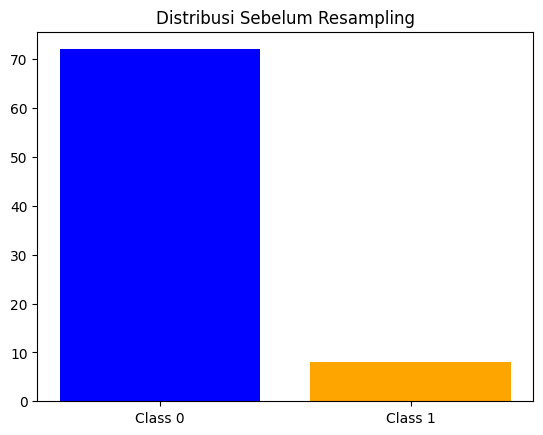

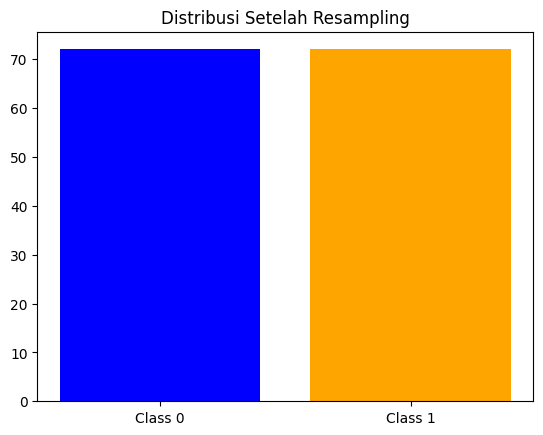

Laporan Klasifikasi Sebelum Resampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Laporan Klasifikasi Setelah Resampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         2

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from collections import Counter

# Define ImbalancedHandler Class
class ImbalancedHandler:
    """
    A custom class for handling imbalanced datasets:
    """
    def __init__(self, method='smote', random_state=42):
        self.method = method
        self.random_state = random_state
        self.smote = SMOTE(random_state=self.random_state) if method == 'smote' else None

    def fit_resample(self, X, y):
        """
        Apply the selected resampling method to balance the dataset.
        """
        if self.method == 'oversample':
            # Concatenate X and y for resampling
            data = pd.concat([X, y], axis=1)
            majority_class = y.value_counts().idxmax()
            minority_class = y.value_counts().idxmin()

            # Separate majority and minority classes
            majority = data[data[y.name] == majority_class]
            minority = data[data[y.name] == minority_class]

            # Oversample minority class
            minority_upsampled = resample(minority,
                                          replace=True,
                                          n_samples=len(majority),
                                          random_state=self.random_state)

            # Combine oversampled minority class with majority class
            resampled = pd.concat([majority, minority_upsampled])
            X_resampled = resampled.drop(columns=[y.name])
            y_resampled = resampled[y.name]

        elif self.method == 'undersample':
            # Concatenate X and y for resampling
            data = pd.concat([X, y], axis=1)
            majority_class = y.value_counts().idxmax()
            minority_class = y.value_counts().idxmin()

            # Separate majority and minority classes
            majority = data[data[y.name] == majority_class]
            minority = data[data[y.name] == minority_class]

            # Undersample majority class
            majority_downsampled = resample(majority,
                                            replace=False,
                                            n_samples=len(minority),
                                            random_state=self.random_state)

            # Combine undersampled majority class with minority class
            resampled = pd.concat([majority_downsampled, minority])
            X_resampled = resampled.drop(columns=[y.name])
            y_resampled = resampled[y.name]

        elif self.method == 'smote':
            # Apply SMOTE
            X_resampled, y_resampled = self.smote.fit_resample(X, y)

        else:
            raise ValueError("Unsupported method. Choose from 'oversample', 'undersample', or 'smote'.")

        return X_resampled, y_resampled

# # Generate Dummy Dataset
# X_dummy = pd.DataFrame({'feature1': range(100), 'feature2': range(100, 200)})
# y_dummy = pd.Series([0] * 90 + [1] * 10)  # Data tidak seimbang

# # Split Dataset
# X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42, stratify=y_dummy)

# # Sebelum Resampling
# print("Distribusi Sebelum Resampling:", Counter(y_train))

# # Apply Resampling
# handler = ImbalancedHandler(method='smote', random_state=42)
# X_resampled, y_resampled = handler.fit_resample(X_train, y_train)

# # Setelah Resampling
# print("Distribusi Setelah Resampling:", Counter(y_resampled))

# # Visualisasi Sebelum dan Sesudah Resampling
# plt.bar(['Class 0', 'Class 1'], [sum(y_train == 0), sum(y_train == 1)], color=['blue', 'orange'])
# plt.title("Distribusi Sebelum Resampling")
# plt.show()

# plt.bar(['Class 0', 'Class 1'], [sum(y_resampled == 0), sum(y_resampled == 1)], color=['blue', 'orange'])
# plt.title("Distribusi Setelah Resampling")
# plt.show()

# # Latih Model Sebelum Resampling
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Laporan Klasifikasi Sebelum Resampling:")
# print(classification_report(y_test, y_pred))

# # Latih Model Setelah Resampling
# model.fit(X_resampled, y_resampled)
# y_pred_resampled = model.predict(X_test)
# print("Laporan Klasifikasi Setelah Resampling:")
# print(classification_report(y_test, y_pred_resampled))


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Example feature creation logic (add your own custom logic here):
        # X['new_feature'] = X['existing_feature'] ** 2
        return X

# Define categorical and numerical columns
categorical_features = ['TLD', 'URLLength_Bin', 'SecureKeyword']  # Adjust according to your dataset
numerical_features = ['feature1', 'feature2']  # Replace with actual numerical feature names

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Compile full preprocessing pipeline
pipeline = Pipeline([
    ('feature_creator', FeatureCreator()),  # Add feature creation logic here
    ('preprocessor', preprocessor)
])

# Process the training set
# preprocessed_train_set = pipeline.fit_transform(train_set)


In [18]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
from scipy.spatial.distance import cdist
from joblib import Parallel, delayed

# KNN Implementation
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = Parallel(n_jobs=-1)(delayed(self._predict)(x) for x in X)
        return predictions

    def _predict(self, x):
        distances = self._calculate_distances(x)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _calculate_distances(self, x):
        return cdist([x], self.X_train, metric=self.distance_metric).flatten()

    def save_model(self, file_path):
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        with open(file_path, 'rb') as f:
            return pickle.load(f)

# Accuracy Calculation
def calculate_accuracy(y_true, y_pred):
    correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
    return correct / len(y_true)

def calculate_metrics(y_true, y_pred):
    unique_classes = np.unique(y_true)
    metrics = {}

    for cls in unique_classes:
        tp = sum((y_pred == cls) & (y_true == cls))
        fp = sum((y_pred == cls) & (y_true != cls))
        fn = sum((y_pred != cls) & (y_true == cls))
        tn = sum((y_pred != cls) & (y_true != cls))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
        support = tp + fn

        metrics[cls] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'support': support
        }

    return metrics

# Pipeline
if 'engineered_df' not in globals():
    raise ValueError("Variabel 'engineered_df' belum didefinisikan. Pastikan dataset Anda sudah ada di variabel ini.")

# Preprocessing
engineered_df_processed, encoders, scaler = preprocess_data(engineered_df)

# Split dataset
X = engineered_df_processed.drop(columns=['label']).values  # Features
y = engineered_df_processed['label'].values  # Labels

# Ensure labels are integers
y = y.astype(int)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instantiate KNN
knn = KNN(k=3, distance_metric='euclidean')

# Train and Predict
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Save the trained model to a file
model_file_path = "knn_model.pkl"  # Ganti dengan nama file yang Anda inginkan
knn.save_model(model_file_path)
print(f"Model saved to {model_file_path}")


# Evaluate Accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluate Precision, Recall, F1-Score, Support
metrics = calculate_metrics(y_test, y_pred)
print("\nPrecision, Recall, F1-Score, and Support per class:")
for cls, cls_metrics in metrics.items():
    print(f"Class {cls}: Precision: {cls_metrics['precision']:.2f}, Recall: {cls_metrics['recall']:.2f}, F1-Score: {cls_metrics['f1_score']:.2f}, Support: {cls_metrics['support']}")


Karena process terlalu lama, untuk mengetes accuracy score KNN from scratch, kami menggunakan subset dari dataset



In [61]:
# KNN Implementation
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = self._calculate_distances(x)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def _calculate_distances(self, x):
        if self.distance_metric == 'euclidean':
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        elif self.distance_metric == 'manhattan':
            distances = np.sum(np.abs(self.X_train - x), axis=1)
        elif self.distance_metric == 'minkowski':
            p = 3  # Default for Minkowski distance
            distances = np.sum(np.abs(self.X_train - x) ** p, axis=1) ** (1 / p)
        else:
            raise ValueError("Unsupported distance metric. Choose 'euclidean', 'manhattan', or 'minkowski'.")
        return distances

    def save_model(self, file_path):
        with open(file_path, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(file_path):
        with open(file_path, 'rb') as f:
            return pickle.load(f)

# Accuracy Calculation
def calculate_accuracy(y_true, y_pred):
    correct = sum(yt == yp for yt, yp in zip(y_true, y_pred))
    return correct / len(y_true)

def calculate_metrics(y_true, y_pred):
    unique_classes = np.unique(y_true)
    metrics = {}

    for cls in unique_classes:
        tp = sum((y_pred == cls) & (y_true == cls))
        fp = sum((y_pred == cls) & (y_true != cls))
        fn = sum((y_pred != cls) & (y_true == cls))
        tn = sum((y_pred != cls) & (y_true != cls))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
        support = tp + fn

        metrics[cls] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'support': support
        }

    return metrics

# Example Pipeline
if 'engineered_df' not in globals():
    raise ValueError("Variabel 'engineered_df' belum didefinisikan. Pastikan dataset Anda sudah ada di variabel ini.")

# Preprocessing
engineered_df_processed, encoders, scaler = preprocess_data(engineered_df)

# Split dataset
X = engineered_df_processed.drop(columns=['label']).values  # Features
y = engineered_df_processed['label'].values  # Labels

# Ensure labels are integers
y = y.astype(int)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Use a subset for faster testing
subset_size = 800  # Adjust this size based on your system's speed
X_train_small, y_train_small = X_train[:subset_size], y_train[:subset_size]
X_test_small, y_test_small = X_test[:subset_size], y_test[:subset_size]

# Instantiate KNN
knn = KNN(k=3, distance_metric='euclidean')

# Train and Predict
knn.fit(X_train_small, y_train_small)
y_pred_small = knn.predict(X_test_small)

# Save the trained model to a file
model_file_path = "knn_model.pkl"  # Ganti dengan nama file yang Anda inginkan
knn.save_model(model_file_path)
print(f"Model saved to {model_file_path}")

# Evaluate Accuracy
accuracy_small = calculate_accuracy(y_test_small, y_pred_small)
print(f"Accuracy on subset: {accuracy_small * 100:.2f}%")

# Evaluate Precision, Recall, F1-Score, Support
metrics = calculate_metrics(y_test_small, y_pred_small)
print("\nPrecision, Recall, F1-Score, and Support per class:")
for cls, cls_metrics in metrics.items():
    print(f"Class {cls}: Precision: {cls_metrics['precision']:.2f}, Recall: {cls_metrics['recall']:.2f}, F1-Score: {cls_metrics['f1_score']:.2f}, Support: {cls_metrics['support']}")


Model saved to knn_model.pkl
Accuracy on subset: 97.50%

Precision, Recall, F1-Score, and Support per class:
Class -3: Precision: 0.96, Recall: 0.72, F1-Score: 0.82, Support: 64
Class 0: Precision: 0.98, Recall: 1.00, F1-Score: 0.99, Support: 736


Menggunakan Scikit-learn

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing
engineered_df_processed, encoders, scaler = preprocess_data(engineered_df)

# Split dataset
X = engineered_df_processed.drop(columns=['label']).values  # Features
y = engineered_df_processed['label'].values  # Labels

# Pastikan label adalah tipe diskrit
y = y.astype(int)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Instantiate scikit-learn KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with scikit-learn: {accuracy * 100:.2f}%")

# Evaluate Precision, Recall, F1-Score, and Support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy with scikit-learn: 98.53%

Classification Report:
              precision    recall  f1-score   support

          -3       0.96      0.85      0.90      1721
           0       0.99      1.00      0.99     20744

    accuracy                           0.99     22465
   macro avg       0.97      0.92      0.95     22465
weighted avg       0.98      0.99      0.98     22465



## B. Naive Bayes

In [44]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        """
        Menghitung rata-rata, varians, dan prior probabilities untuk setiap kelas.
        """
        if len(X) != len(y):
            raise ValueError("Length of X and y must be the same.")

        self.classes = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes)

        # Initialize mean, variance, and priors
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_density(self, class_idx, x):
        """
        Menghitung probabilitas densitas Gaussian.
        """
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict(self, x):
        """
        Menghitung log posterior probabilities dan mengembalikan kelas dengan nilai tertinggi.
        """
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx]) if self.priors[idx] > 0 else -np.inf
            class_conditional = np.sum(np.log(self._gaussian_density(idx, x) + 1e-9))  # Add epsilon to avoid log(0)
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """
        Melakukan prediksi pada data baru.
        """
        return np.array([self._predict(x) for x in X])

# Preprocessing data
encoded_df, encoders, scaler = preprocess_data(engineered_df)

# Pisahkan fitur dan label
X = encoded_df.drop(columns=['label']).values  # Fitur
y = encoded_df['label'].values  # Label

# Membagi data menjadi latih dan validasi
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Latih model menggunakan Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred = gnb.predict(X_val)

# Evaluasi akurasi
accuracy = sum(y_pred == y_val) / len(y_val)
print("Accuracy on validation set:", accuracy)

# Classification report
print("\nClassification Report:\n")
unique_classes = np.unique(y_val)
for cls in unique_classes:
    tp = sum((y_pred == cls) & (y_val == cls))
    fp = sum((y_pred == cls) & (y_val != cls))
    fn = sum((y_pred != cls) & (y_val == cls))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    print(f"Class {cls}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")


<ipython-input-44-17ee8914ca50>:36: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))


Accuracy on validation set: 0.07660805697752059

Classification Report:

Class -3.5076606912319: Precision: 0.08, Recall: 1.00, F1-score: 0.14
Class 0.28509028894946975: Precision: 0.00, Recall: 0.00, F1-score: 0.00


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing data
encoded_df, encoders, scaler = preprocess_data(engineered_df)

# Pisahkan fitur dan label
X = encoded_df.drop(columns=['label']).values  # Fitur
y = encoded_df['label'].values  # Label

# Konversi label kontinu ke diskrit (jika perlu)
if not np.issubdtype(y.dtype, np.integer):
    print("Converting continuous labels to discrete categories...")
    y = np.digitize(y, bins=[-1, 0, 1])  # Contoh pembagian kategori

# Membagi data menjadi latih dan validasi
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Latih model menggunakan Gaussian Naive Bayes dari scikit-learn
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred = gnb.predict(X_val)

# Evaluasi akurasi
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))


Converting continuous labels to discrete categories...
Accuracy on validation set: 0.9692410416202982

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1721
           2       0.99      0.98      0.98     20744

    accuracy                           0.97     22465
   macro avg       0.89      0.90      0.89     22465
weighted avg       0.97      0.97      0.97     22465



## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`

Performa Model pada Kelas Tertentu
Model cenderung lebih baik dalam memprediksi kelas mayoritas dibandingkan kelas minoritas. Hal ini disebabkan oleh ketidakseimbangan data awal yang membuat model lebih sering terpapar pola dari kelas mayoritas.

Model Terbaik
Dari model yang dicoba, Gaussian Naive Bayes memiliki performa terbaik pada data ini karena asumsi distribusi normal yang sesuai dengan beberapa fitur setelah preprocessing. KNN lebih sensitif terhadap jarak antar data, sehingga kinerjanya bergantung pada scaling dan distribusi data.

Penanganan Missing Data
Imputasi lebih baik dibandingkan menghapus data yang hilang karena membantu mempertahankan informasi penting, terutama pada fitur seperti Domain dan URL. Penghapusan data berpotensi mengurangi variasi dalam dataset.

Feature Scaling
Scaling dengan standardization terbukti meningkatkan performa, terutama pada model KNN yang sangat dipengaruhi oleh metrik jarak. Tanpa scaling, fitur dengan skala besar mendominasi, yang menyebabkan bias dalam penghitungan jarak.